### 导入autoload扩展

In [1]:
%load_ext autoreload
%autoreload 2

### 下载并载入[Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist)数据集

In [115]:
from utils import download_minist
from full_connect_network import FullConnectNet
from solve import Solver
import random

data = download_minist()
data['X_train'] = data['X_train']
data['y_train'] = data['y_train']

def train_with_params(
        hidden_dims, 
        types, 
        reg, 
        loss,
        update_rule,
        optim_config,
        lr_decay,
        batch_size,
        iters
    ):
    
    three_layer_model = FullConnectNet(
        hidden_dims=hidden_dims, 
        types=types, 
        reg=reg, 
        loss=loss
    )

    three_layer_net = Solver(
        model=three_layer_model, 
        data=data,
        update_rule= update_rule,
        optim_config = optim_config,
        lr_decay=lr_decay,
        batch_size=batch_size,
        print_iter=500,
        iters=iters
    )

    three_layer_net.train() 

    import matplotlib.pyplot as plt

    plt.subplot(2, 1, 1)
    plt.title('Training loss')
    plt.plot(three_layer_net.loss_hist, 'o')
    plt.xlabel('Iteration')

    plt.subplot(2, 1, 2)
    plt.title('Accuracy')
    plt.plot(three_layer_net.train_acc_hist, '-o', label='train')
    plt.plot(three_layer_net.val_acc_hist, '-o', label='val')
    plt.plot([0.5] * len(three_layer_net.val_acc_hist), 'k--')
    plt.xlabel('Epoch')
    plt.legend(loc='lower right')
    plt.gcf().set_size_inches(15, 10)
    plt.show()



(Time   0.00 s; Iteration    1 / 60000) loss 10.076519
[Epoch  0 / 10] train accuracy: 0.109150; val accuracy: 0.112200
(Time   2.66 s; Iteration  501 / 60000) loss 0.629779
(Time   4.87 s; Iteration 1001 / 60000) loss 0.581999
(Time   7.07 s; Iteration 1501 / 60000) loss 0.683308
(Time   9.27 s; Iteration 2001 / 60000) loss 0.489914
(Time  11.34 s; Iteration 2501 / 60000) loss 0.619592
(Time  13.66 s; Iteration 3001 / 60000) loss 0.364145
(Time  15.85 s; Iteration 3501 / 60000) loss 0.383277
(Time  17.87 s; Iteration 4001 / 60000) loss 0.372108
(Time  20.03 s; Iteration 4501 / 60000) loss 0.500672
(Time  22.12 s; Iteration 5001 / 60000) loss 0.367610
(Time  24.25 s; Iteration 5501 / 60000) loss 0.318396
[Epoch  1 / 10] train accuracy: 0.893950; val accuracy: 0.875500
(Time  26.77 s; Iteration 6001 / 60000) loss 0.305008
(Time  28.92 s; Iteration 6501 / 60000) loss 0.314187
(Time  31.19 s; Iteration 7001 / 60000) loss 0.320458
(Time  33.22 s; Iteration 7501 / 60000) loss 0.368365
(Time

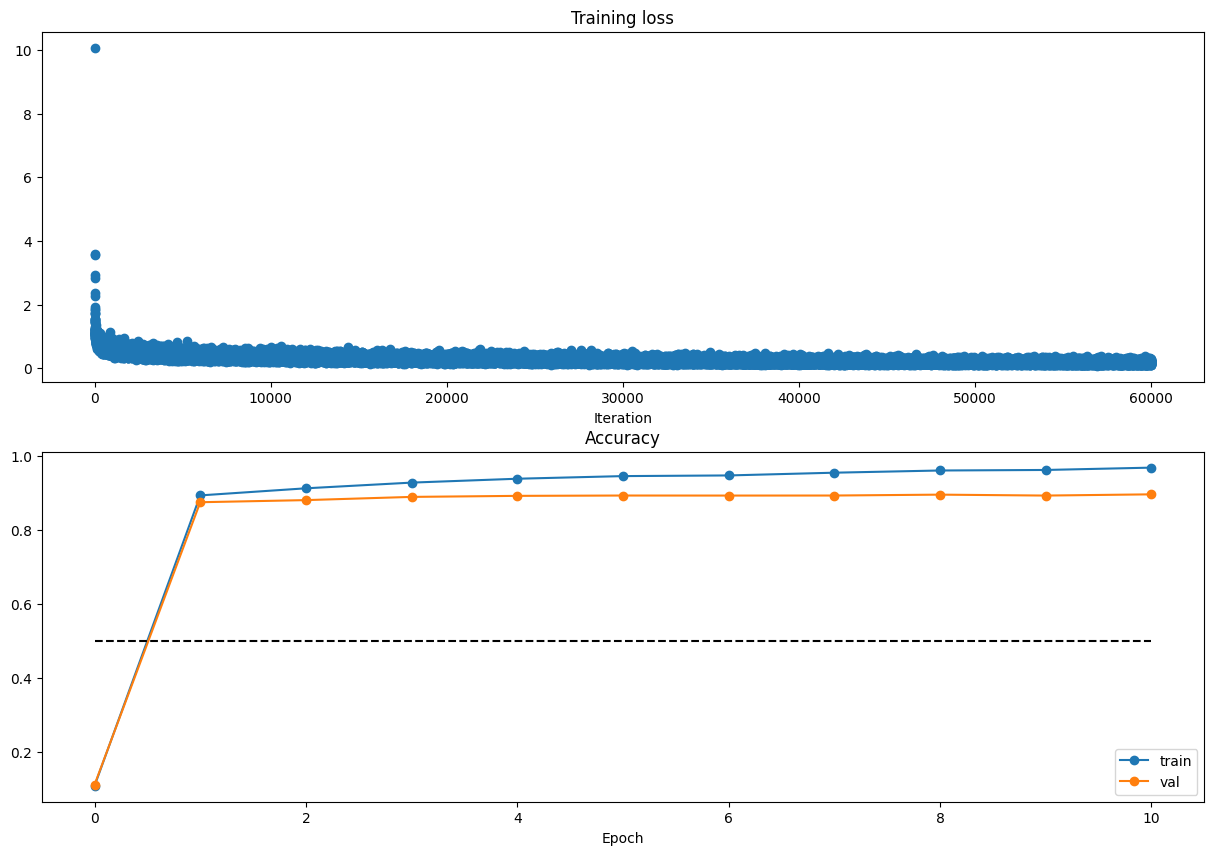

In [117]:
random.seed(419)

hidden_dims = [128, 64]
activation = ['relu']
reg = 1e-3
loss = 'ce'

update_rule = 'sgd'
optim_config = {
    'learning_rate': 5e-3
}
lr_decay=0.9
batch_size=128
print_iter=500
iters=60000


train_with_params(hidden_dims=hidden_dims, 
        types=activation, 
        reg=reg, 
        loss=loss,
        update_rule=update_rule,
        optim_config=optim_config,
        lr_decay=lr_decay,
        batch_size=batch_size,
        iters=iters
    )

```python
{
    hidden_dims = [128, 64, 32]
    activation = ['relu']
    reg = 1e-3
    loss = 'ce'
    three_layer_model = FullConnectNet(
        hidden_dims=hidden_dims, 
        types=activation, 
        reg=reg, 
        loss=loss
    )
    three_layer_net = Solver(
        model=three_layer_model, 
        data=data,
        update_rule='sgd_momentum',
        optim_config = {
            'learning_rate': 1e-2
        },
        lr_decay=0.9 / 0.8,
        batch_size=64,
        print_iter=100
    )
}
{
    hidden_dims = [64, 32]
    activation = ['relu']
    reg = 1e-3
    loss = 'ce'

    update_rule = 'adam'
    optim_config = {
        'learning_rate': 1e-4
    }
    lr_decay=0.8
    batch_size=128
    print_iter=500
    iters=20000
}

```